In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

print("Python version:", sys.version)
print("Python environment:", sys.executable)


Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
Python environment: /Users/siddharth/miniconda3/envs/tensorflow/bin/python


In [3]:
import tensorflow as tf

In [4]:
import sys
print(sys.version)

3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]


In [5]:
import tensorflow as tf

In [6]:
from keras.preprocessing.image import ImageDataGenerator, load_img

In [7]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [10]:
import cv2

In [11]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [12]:
import os

In [13]:
filenames = os.listdir("/Users/siddharth/Library/CloudStorage/GoogleDrive-pratimakumari2305@gmail.com/My Drive/OneDrive - OsloMet/OsloMet/MY PYTHON/Machine_Learning_Practice_2023/MachineLearning/train")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [14]:
df.head()

,filename,category
0,cat_386.jpg,0
1,cat_15.jpg,0
2,dog_423.jpg,1
3,dog_345.jpg,1
4,dog_351.jpg,1


In [15]:
df.tail()

,filename,category
553,dog_162.jpg,1
554,cat_348.jpg,0
555,dog_22.jpg,1
556,cat_24.jpg,0
557,dog_412.jpg,1


<Axes: xlabel='category'>

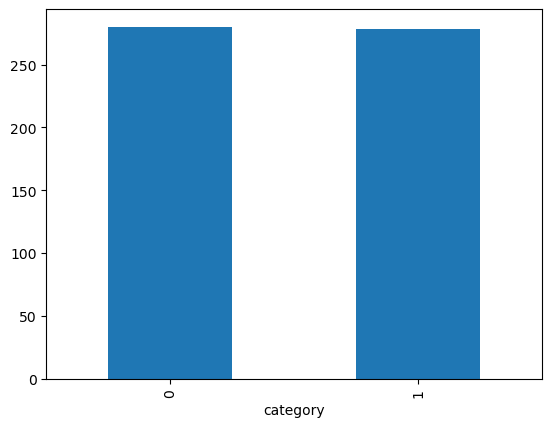

In [16]:
df['category'].value_counts().plot.bar()

In [17]:
model= Sequential()

2023-08-01 17:28:37.628236: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-01 17:28:37.628253: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-01 17:28:37.628256: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-01 17:28:37.628284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-01 17:28:37.628295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [19]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [20]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [21]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

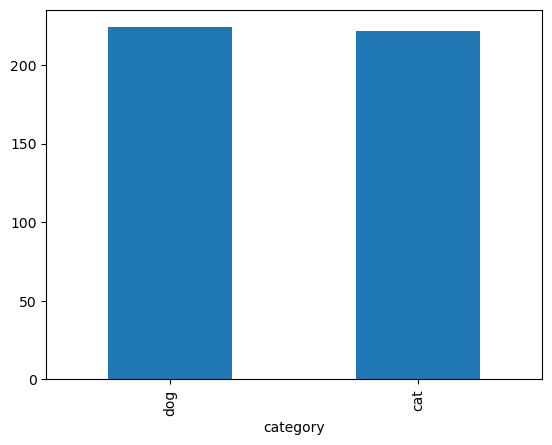

In [22]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

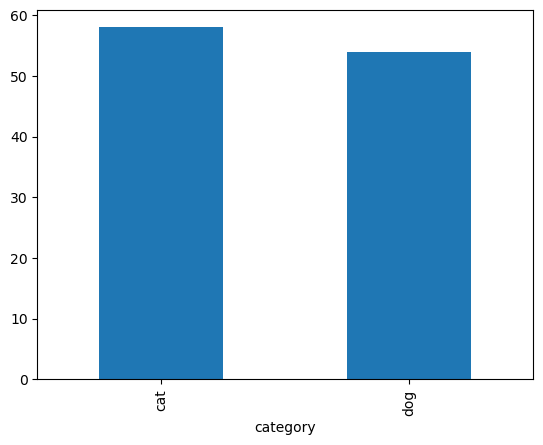

In [23]:
validate_df['category'].value_counts().plot.bar()

In [24]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 445 validated image filenames belonging to 2 classes.


/Users/siddharth/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [26]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 112 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Found 1 validated image filenames belonging to 1 classes.


In [28]:
epochs = 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save("model.h5")

Epoch 1/50


/var/folders/fr/p253sg2536gclcy0s7m_d7940000gn/T/ipykernel_29194/2098705055.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-08-01 17:28:39.240265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 2.2517 - accuracy: 0.5581

2023-08-01 17:28:42.001650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 3s 87ms/step - loss: 2.2517 - accuracy: 0.5581 - val_loss: 0.7551 - val_accuracy: 0.4952 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 2s 74ms/step - loss: 1.1648 - accuracy: 0.5395 - val_loss: 1.0510 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 2s 73ms/step - loss: 1.0537 - accuracy: 0.5581 - val_loss: 0.7104 - val_accuracy: 0.5143 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 2s 73ms/step - loss: 0.9527 - accuracy: 0.5651 - val_loss: 0.8817 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 2s 74ms/step - loss: 0.9069 - accuracy: 0.5535 - val_loss: 0.9765 - val_accuracy: 0.5143 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 2s 73ms/step - loss: 0.8864 - accuracy: 0.5535 - val_loss: 0.6845 - val_accuracy: 0.5619 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 2s 74ms/step - loss: 0.8336 - accur

/Users/siddharth/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


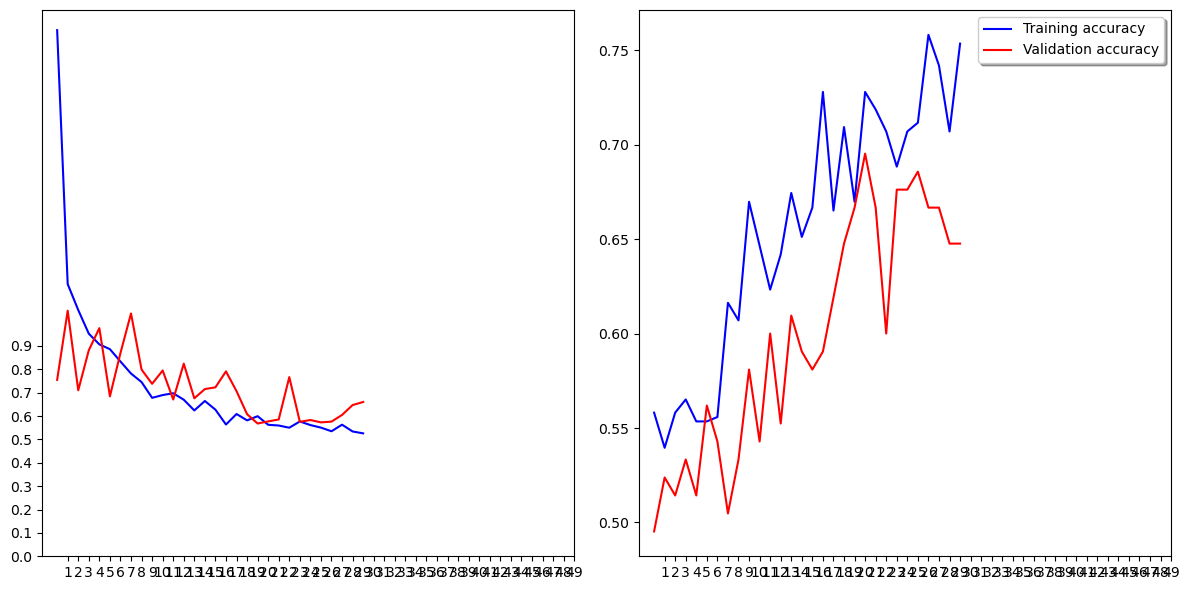

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [32]:
path = "/Users/siddharth/Library/CloudStorage/GoogleDrive-pratimakumari2305@gmail.com/My Drive/OneDrive - OsloMet/OsloMet/MY PYTHON/Machine_Learning_Practice_2023/MachineLearning/test"
for i in range(10):
    
    all_test_images = os.listdir(path)
    random_image = random.choice(all_test_images)
    img = cv2.imread(os.path.join(path, random_image))
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(1000)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 19ms/step
cat
1/1 [==============================] - 0s 22ms/step
cat
1/1 [==============================] - 0s 19ms/step
cat
1/1 [==============================] - 0s 18ms/step
cat
1/1 [==============================] - 0s 18ms/step
cat
1/1 [==============================] - 0s 15ms/step
cat
1/1 [==============================] - 0s 18ms/step
cat
1/1 [==============================] - 0s 17ms/step
cat
1/1 [==============================] - 0s 18ms/step
cat
1/1 [==============================] - 0s 17ms/step
cat
